In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None


In [135]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
sub_df=pd.read_csv("SampleSubmission.csv")
descp=pd.read_csv("VariableDefinitions.csv")

In [136]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [137]:
print("Size of train",train_df.shape)
print("Size of test",test_df.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [138]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


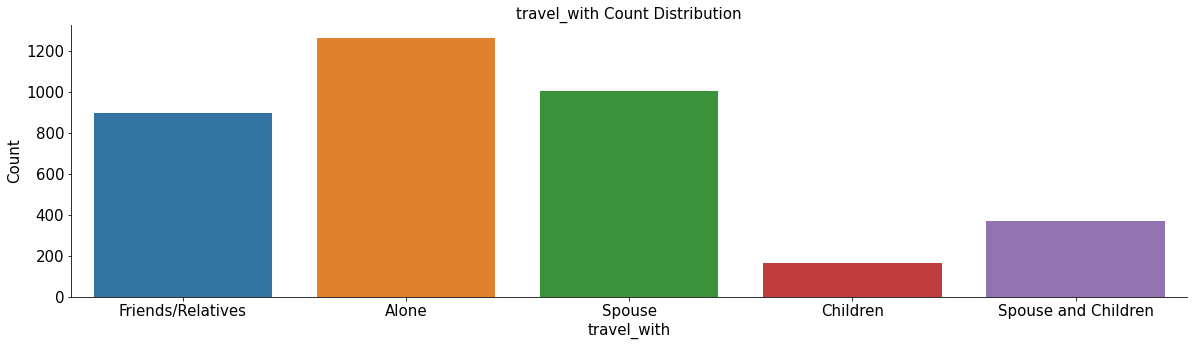

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train_df)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [140]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['main_activity'], train_df['country'], margins=True)

country,ALGERIA,ANGOLA,ARGENTINA,AUSTRALIA,AUSTRIA,BELGIUM,BERMUDA,BRAZIL,BURGARIA,BURUNDI,CANADA,CAPE VERDE,CHILE,CHINA,COLOMBIA,COMORO,CONGO,COSTARICA,CROATIA,CYPRUS,CZECH REPUBLIC,DENMARK,DJIBOUT,DOMINICA,DRC,EGYPT,ESTONIA,ETHIOPIA,FINLAND,FRANCE,GEORGIA,GERMANY,GHANA,GREECE,HUNGARY,INDIA,INDONESIA,IRAN,IRAQ,IRELAND,ISRAEL,ITALY,IVORY COAST,JAPAN,KENYA,KOREA,KUWAIT,LATVIA,LEBANON,LESOTHO,LITHUANIA,LUXEMBOURG,MADAGASCAR,MALAWI,MALAYSIA,MALT,MAURITIUS,MEXICO,MONTENEGRO,MORROCO,MOZAMBIQUE,MYANMAR,NAMIBIA,NEPAL,NETHERLANDS,NEW ZEALAND,NIGER,NIGERIA,NORWAY,OMAN,PAKISTAN,PHILIPINES,POLAND,PORTUGAL,QATAR,ROMANIA,RUSSIA,RWANDA,SCOTLAND,SERBIA,SINGAPORE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SUDAN,SWAZILAND,SWEDEN,SWIZERLAND,TAIWAN,THAILAND,TRINIDAD TOBACCO,TUNISIA,TURKEY,UAE,UGANDA,UKRAIN,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,YEMEN,ZAMBIA,ZIMBABWE,All
main_activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beach tourism,1,0,0,15,3,7,0,1,1,9,24,0,0,19,1,1,0,0,1,0,0,10,0,0,5,2,0,1,2,55,1,59,0,2,0,16,1,1,0,5,3,210,0,2,42,2,1,0,1,0,0,1,0,6,1,1,0,0,1,0,2,0,1,1,8,1,1,0,4,9,2,0,7,1,1,2,5,14,0,6,1,0,1,78,38,0,2,1,12,9,0,0,0,1,1,11,34,1,1,94,64,1,1,19,76,1025
Bird watching,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,3,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,1,3,0,0,6,4,37
Conference tourism,0,0,0,23,4,1,0,1,0,0,15,0,0,1,0,0,0,0,1,0,5,6,0,0,0,3,0,0,0,25,0,18,0,0,0,1,0,0,0,2,1,5,0,6,3,3,0,1,0,0,1,0,0,1,16,0,0,0,0,0,0,0,0,0,3,5,0,0,3,0,0,0,3,0,0,0,1,1,0,0,3,0,0,2,7,0,0,0,4,4,0,0,0,0,1,1,0,0,3,99,83,0,0,1,0,367
Cultural tourism,0,1,0,9,2,7,1,1,0,22,8,0,0,1,0,0,2,0,0,0,3,5,1,0,10,0,1,0,2,19,0,25,0,2,0,3,0,0,0,2,2,32,0,7,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,1,5,6,0,0,1,1,0,0,0,8,1,0,0,0,0,11,10,0,1,0,3,3,0,0,0,0,1,4,18,0,1,46,42,0,0,4,6,359
Diving and Sport Fishing,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,13
Hunting tourism,0,0,0,4,0,4,0,0,1,16,3,0,0,2,0,0,5,0,0,0,0,3,0,0,4,0,0,0,0,7,0,8,0,2,0,7,0,0,0,1,0,9,1,17,62,1,0,0,0,1,0,0,1,9,2,0,0,0,0,0,1,0,1,0,1,0,0,0,3,12,1,0,0,0,2,0,0,6,1,0,0,0,0,20,5,0,1,0,3,3,0,1,0,0,0,5,43,1,1,43,23,0,1,45,64,457
Mountain climbing,0,0,0,0,1,2,0,1,0,4,3,1,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,5,0,2,0,3,1,0,0,19,1,0,1,0,0,2,0,3,39,0,0,0,2,0,0,0,0,3,0,0,1,0,0,0,4,0,0,1,1,0,0,0,1,2,1,0,0,1,0,0,0,7,0,0,0,0,0,29,1,0,0,0,2,2,0,1,0,0,0,3,14,0,0,11,21,0,0,14,18,234
Wildlife tourism,1,0,1,131,7,27,0,6,0,13,61,0,2,39,2,0,3,1,0,0,3,17,1,1,11,4,0,0,4,165,0,103,1,1,2,36,1,1,0,19,9,122,0,18,72,6,1,1,0,0,3,1,0,1,3,1,1,2,0,1,1,1,0,0,91,12,0,3,5,4,2,2,4,6,4,0,2,3,2,0,3,2,0,81,103,3,0,2,13,41,9,0,1,0,0,8,48,0,6,230,456,0,0,100,105,2259
business,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,4,0,0,0,2,0,0,0,0,1,11,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,8,0,0,0,1,1,58


In [141]:
data=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [142]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [143]:
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [144]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [145]:
 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

In [146]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [147]:
data.head(2)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,2,1.0,1.0,0,0,0,0,0,0,0,13,0,0,674602.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,1,1.0,0.0,0,0,0,0,0,0,0,14,7,1,3214906.5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [148]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [149]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]


In [150]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [151]:
print(train_df.shape)
print(test_df.shape)

(4809, 55)
(1601, 55)


In [152]:
#Modelling
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]


In [153]:
train_df[cols]

,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,total_persons,total_nights_spent
0,101,2,1,1,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,13
1,111,1,1,0,0,0,0,0,0,0,0,14,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,21
2,111,1,0,1,0,0,0,0,0,0,0,1,31,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,32
3,111,1,1,1,0,1,1,1,1,1,0,11,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,11
4,17,4,1,0,0,0,0,0,0,0,0,7,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,107,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2
4805,112,1,1,1,1,1,1,1,1,1,1,11,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,11
4806,73,4,1,0,0,0,0,0,0,0,0,3,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,10
4807,95,1,1,1,1,1,1,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,5


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [155]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 53) (3606,)
(1203, 53) (1203,)


In [23]:
from xgboost import XGBRegressor
xgb=XGBRegressor( n_estimators= 200,learning_rate = 0.05,max_depth =5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [24]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 5105456.513408199


In [25]:
#predict and prepare submission file
sub = test_df[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)

## CatBoost

In [176]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(X_train, 
                  y_train,
                 )
test_pool = Pool(X_test,
                ) 

# specify the training parameters 
cat_model = CatBoostRegressor(iterations=1000, 
                          depth=8, 
                          learning_rate=0.01, 
                          loss_function='MAE',
                             )
#train the model
cat_model.fit(train_pool)
# make the prediction using the resulting model
preds = cat_model.predict(test_pool)


0:	learn: 7035887.6105208	total: 3.31ms	remaining: 3.31s
1:	learn: 7002654.2196686	total: 14.6ms	remaining: 7.28s
2:	learn: 6975697.3373862	total: 18ms	remaining: 5.98s
3:	learn: 6947295.4341144	total: 25.4ms	remaining: 6.33s
4:	learn: 6918817.2456411	total: 30.2ms	remaining: 6.01s
5:	learn: 6890629.4620780	total: 37.6ms	remaining: 6.23s
6:	learn: 6858347.9331355	total: 42.4ms	remaining: 6.01s
7:	learn: 6828325.1989928	total: 47.2ms	remaining: 5.86s
8:	learn: 6797667.8492471	total: 52.9ms	remaining: 5.82s
9:	learn: 6767268.3064901	total: 57.8ms	remaining: 5.72s
10:	learn: 6740601.8469946	total: 61.3ms	remaining: 5.51s
11:	learn: 6713181.9642553	total: 64.5ms	remaining: 5.31s
12:	learn: 6685647.1364772	total: 69.7ms	remaining: 5.29s
13:	learn: 6657449.6870854	total: 74.5ms	remaining: 5.25s
14:	learn: 6633043.7792101	total: 79.3ms	remaining: 5.21s
15:	learn: 6605365.5338431	total: 85ms	remaining: 5.23s
16:	learn: 6576961.7920810	total: 91ms	remaining: 5.26s
17:	learn: 6548733.1130388	tot

150:	learn: 4908642.1060979	total: 889ms	remaining: 5s
151:	learn: 4900767.8356133	total: 896ms	remaining: 5s
152:	learn: 4895282.9249604	total: 906ms	remaining: 5.01s
153:	learn: 4891450.4136663	total: 911ms	remaining: 5s
154:	learn: 4884773.5032266	total: 919ms	remaining: 5.01s
155:	learn: 4879937.7916857	total: 925ms	remaining: 5s
156:	learn: 4874515.1389206	total: 935ms	remaining: 5.02s
157:	learn: 4871438.1584809	total: 941ms	remaining: 5.01s
158:	learn: 4866911.5466093	total: 950ms	remaining: 5.03s
159:	learn: 4861057.2837584	total: 956ms	remaining: 5.02s
160:	learn: 4855530.1229170	total: 962ms	remaining: 5.01s
161:	learn: 4849650.8720590	total: 969ms	remaining: 5.01s
162:	learn: 4843163.7229977	total: 977ms	remaining: 5.02s
163:	learn: 4837579.8872271	total: 983ms	remaining: 5.01s
164:	learn: 4833046.6859091	total: 991ms	remaining: 5.01s
165:	learn: 4829084.5387854	total: 999ms	remaining: 5.02s
166:	learn: 4822883.6801114	total: 1.01s	remaining: 5.02s
167:	learn: 4817481.348433

311:	learn: 4377877.3722427	total: 1.95s	remaining: 4.31s
312:	learn: 4375575.4089632	total: 1.96s	remaining: 4.3s
313:	learn: 4372155.1500654	total: 1.97s	remaining: 4.3s
314:	learn: 4370963.6840391	total: 1.98s	remaining: 4.3s
315:	learn: 4368735.2288024	total: 1.99s	remaining: 4.3s
316:	learn: 4366097.2883919	total: 1.99s	remaining: 4.3s
317:	learn: 4362774.7810626	total: 2s	remaining: 4.3s
318:	learn: 4361615.5789044	total: 2.01s	remaining: 4.29s
319:	learn: 4358916.7178866	total: 2.02s	remaining: 4.29s
320:	learn: 4354756.7638220	total: 2.03s	remaining: 4.29s
321:	learn: 4352859.5391319	total: 2.04s	remaining: 4.29s
322:	learn: 4352177.4440579	total: 2.04s	remaining: 4.28s
323:	learn: 4351577.6127222	total: 2.05s	remaining: 4.28s
324:	learn: 4349744.2822033	total: 2.06s	remaining: 4.27s
325:	learn: 4347749.7417468	total: 2.07s	remaining: 4.27s
326:	learn: 4346443.7882509	total: 2.07s	remaining: 4.26s
327:	learn: 4344353.4118166	total: 2.08s	remaining: 4.26s
328:	learn: 4342442.918

460:	learn: 4130067.8651050	total: 3.01s	remaining: 3.52s
461:	learn: 4128206.4724079	total: 3.02s	remaining: 3.52s
462:	learn: 4127792.6199318	total: 3.03s	remaining: 3.51s
463:	learn: 4127022.6069964	total: 3.03s	remaining: 3.5s
464:	learn: 4125845.4073355	total: 3.04s	remaining: 3.5s
465:	learn: 4124004.0065959	total: 3.05s	remaining: 3.5s
466:	learn: 4122762.0259128	total: 3.06s	remaining: 3.49s
467:	learn: 4122502.7686927	total: 3.06s	remaining: 3.48s
468:	learn: 4121780.4279443	total: 3.07s	remaining: 3.48s
469:	learn: 4121293.7058761	total: 3.08s	remaining: 3.47s
470:	learn: 4119369.7138350	total: 3.08s	remaining: 3.46s
471:	learn: 4119055.1039116	total: 3.09s	remaining: 3.46s
472:	learn: 4118256.2048459	total: 3.1s	remaining: 3.45s
473:	learn: 4116791.1244407	total: 3.1s	remaining: 3.44s
474:	learn: 4116177.4079351	total: 3.11s	remaining: 3.44s
475:	learn: 4115074.4278696	total: 3.12s	remaining: 3.43s
476:	learn: 4113423.9589218	total: 3.13s	remaining: 3.43s
477:	learn: 4112740

619:	learn: 3959307.9265189	total: 4.07s	remaining: 2.5s
620:	learn: 3956979.3633112	total: 4.08s	remaining: 2.49s
621:	learn: 3956027.3667389	total: 4.09s	remaining: 2.49s
622:	learn: 3953577.1753499	total: 4.1s	remaining: 2.48s
623:	learn: 3952739.3688679	total: 4.1s	remaining: 2.47s
624:	learn: 3951079.4250564	total: 4.11s	remaining: 2.47s
625:	learn: 3950500.3137201	total: 4.12s	remaining: 2.46s
626:	learn: 3950092.1170545	total: 4.13s	remaining: 2.45s
627:	learn: 3948254.7276330	total: 4.13s	remaining: 2.45s
628:	learn: 3947388.7083417	total: 4.14s	remaining: 2.44s
629:	learn: 3946182.6790151	total: 4.15s	remaining: 2.44s
630:	learn: 3945125.9608808	total: 4.16s	remaining: 2.43s
631:	learn: 3944253.2974445	total: 4.16s	remaining: 2.42s
632:	learn: 3943517.1638065	total: 4.17s	remaining: 2.42s
633:	learn: 3942884.4556598	total: 4.17s	remaining: 2.41s
634:	learn: 3942094.1455657	total: 4.18s	remaining: 2.4s
635:	learn: 3941671.9402069	total: 4.19s	remaining: 2.4s
636:	learn: 3941139

775:	learn: 3809676.3361800	total: 5.14s	remaining: 1.48s
776:	learn: 3808189.7515253	total: 5.14s	remaining: 1.48s
777:	learn: 3807999.6011021	total: 5.15s	remaining: 1.47s
778:	learn: 3807427.6335526	total: 5.16s	remaining: 1.46s
779:	learn: 3807038.8557114	total: 5.16s	remaining: 1.46s
780:	learn: 3805900.6509192	total: 5.17s	remaining: 1.45s
781:	learn: 3804303.2062337	total: 5.17s	remaining: 1.44s
782:	learn: 3803232.2064997	total: 5.18s	remaining: 1.44s
783:	learn: 3802878.4842109	total: 5.19s	remaining: 1.43s
784:	learn: 3802564.4667631	total: 5.19s	remaining: 1.42s
785:	learn: 3801792.1038872	total: 5.2s	remaining: 1.41s
786:	learn: 3801341.1235524	total: 5.2s	remaining: 1.41s
787:	learn: 3800833.6389813	total: 5.21s	remaining: 1.4s
788:	learn: 3799011.7634639	total: 5.21s	remaining: 1.39s
789:	learn: 3798082.0276433	total: 5.22s	remaining: 1.39s
790:	learn: 3796840.9415778	total: 5.22s	remaining: 1.38s
791:	learn: 3796310.2901762	total: 5.23s	remaining: 1.37s
792:	learn: 37955

921:	learn: 3682084.6376937	total: 6.01s	remaining: 509ms
922:	learn: 3681773.6705088	total: 6.02s	remaining: 502ms
923:	learn: 3680595.0540938	total: 6.03s	remaining: 496ms
924:	learn: 3678657.1555114	total: 6.04s	remaining: 489ms
925:	learn: 3678395.9675002	total: 6.04s	remaining: 483ms
926:	learn: 3677675.1280203	total: 6.04s	remaining: 476ms
927:	learn: 3676314.1055558	total: 6.05s	remaining: 470ms
928:	learn: 3675967.6443124	total: 6.06s	remaining: 463ms
929:	learn: 3675179.7508167	total: 6.06s	remaining: 456ms
930:	learn: 3674012.2542331	total: 6.07s	remaining: 450ms
931:	learn: 3672526.0318403	total: 6.08s	remaining: 443ms
932:	learn: 3671529.4615400	total: 6.08s	remaining: 437ms
933:	learn: 3670552.2295800	total: 6.09s	remaining: 430ms
934:	learn: 3670095.1234505	total: 6.09s	remaining: 424ms
935:	learn: 3669181.4447381	total: 6.1s	remaining: 417ms
936:	learn: 3668619.6409457	total: 6.11s	remaining: 411ms
937:	learn: 3668347.3804870	total: 6.11s	remaining: 404ms
938:	learn: 366

In [177]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, preds)
print('Error {}'.format(mae))

Error 4585313.383684171


In [178]:
#predict and prepare submission file
sub = test_df[cols]
predictions_cat  = cat_model.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_cat})
submission_df.to_csv('submit.csv',index=False)